## EDA: Exploratory Data Analysis

## Training & Test Data

In [1]:
import pandas as pd
import polars as pl
from pathlib import Path

# Set configs
BASE_DIR = Path().resolve().parent.parent
print(BASE_DIR)

/Users/srihariraman/Desktop/DS5220/sensor-fusion-har-project


In [2]:
# Load the datasets
df_test = pl.read_parquet(BASE_DIR / "data" / "processed" / "test.parquet")
df_train = pl.read_parquet(BASE_DIR / "data" / "processed" / "train.parquet")

In [3]:
df_test.columns


['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [4]:
df_test.head()

tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4",…,fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",activity_id,subject,activity
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,str
0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.6355024,0.789497,-0.877764,-0.997766,-0.998414,-0.934345,-0.975669,-0.949824,-0.830478,-0.168084,-0.378996,0.246217,0.521204,-0.487793,0.48228,-0.045462,0.211955,-0.134894,0.130858,-0.014176,-0.105971,0.073544,-0.171516,0.040063,…,-0.700326,-0.77061,-0.797113,-0.764485,-0.820188,-0.937959,-0.77061,-0.970958,-0.798387,0.179435,-1.0,-0.047391,-0.467849,-0.761326,-0.890165,-0.907308,-0.895301,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.0,0.071645,-0.33037,-0.705974,0.006462,0.16292,-0.825886,0.271151,-0.720009,0.276801,-0.057978,5,2,"""STANDING"""
0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,0.683698,0.796706,-0.969097,-0.99958,-0.999646,-0.99772,-0.994006,-0.973637,-0.95072,-0.302437,-0.348243,-0.404785,0.5074924,-0.156495,0.040674,0.272991,0.197566,-0.194556,0.411411,-0.340466,0.077555,-0.084024,0.035305,-0.010083,…,-0.666004,-0.924461,-0.916774,-0.919383,-0.917983,-0.991121,-0.924461,-0.995727,-0.933127,-0.21886,-1.0,-0.031474,-0.090655,-0.461801,-0.951977,-0.938212,-0.938008,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.0,-0.401189,-0.121845,-0.594944,-0.083495,0.0175,-0.434375,0.920593,-0.698091,0.281343,-0.083898,5,2,"""STANDING"""
0.275485,-0.02605,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.93926,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.976782,-0.999954,-0.99957,-0.99872,-0.993456,-0.974266,-0.964976,-0.617916,-0.69549,-0.536693,0.242147,-0.114997,0.032703,0.192385,-0.011945,-0.063363,0.470819,-0.507395,0.188536,-0.231575,0.6321196,-0.550708,…,-0.639809,-0.975209,-0.973998,-0.967097,-0.982849,-0.997663,-0.975209,-0.999504,-0.96826,-0.561266,-0.897436,-0.168805,-0.662317,-0.925364,-0.985689,-0.983273,-0.983422,-0.986857,-0.989609,-0.985689,-0.999831,-0.986148,-0

In [5]:
df_train.head()

tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4",…,fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",activity_id,subject,activity
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,str
0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.94322,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.35991,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,…,-0.80276,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.99924,-0.992656,-0.701291,-1.0,-0.128989,0.586156,0.374605,-0.99199,-0.990697,-0.989941,-0.992448,-0.991048,-0.99199,-0.999937,-0.990458,-0.871306,-1.0,-0.074323,-0.298676,-0.710304,-0.112754,0.0304,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5,1,"""STANDING"""
0.278419,-0.016411,-0.12352,-0.998245,-0.9753,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.98193,-0.999991,-0.999788,-0.998405,-0.99915,-0.977866,-0.948225,-0.714892,-0.50093,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.29431,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,…,-0.90016,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.33631,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.99444,-0.995854,-0.999981,-0.994544,-1.0,-1.0,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5,1,"""STANDING"""
0.279653,-0.019467,-0.113462,-0.99538,-0.967187,-0.978944,-0.99652,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.99966,-0.99947,-0.99713,-0.96481,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.01715,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,…,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0.794872,-0.212728,-0.535352,-0.871914,-0.995031,-0.995127,-0.99464,-0.99606,-0.995866,-0.995031,-0.999973,-0.993755,-1.0,-0.5555

In [6]:
print("Size of test set: ", df_test.shape, "\nSize of train set: ", df_train.shape)


Size of test set:  (2947, 564) 
Size of train set:  (7352, 564)


In [7]:
print("Memory usage of test set: ", df_test.estimated_size() / 1024**2, "MB",
      "\nMemory usage of train set: ", df_train.estimated_size() / 1024**2, "MB")

Memory usage of test set:  12.686511039733887 MB 
Memory usage of train set:  31.648008346557617 MB


## Training Results

In [8]:
import pandas as pd

training_runs_df = pd.read_csv(BASE_DIR / "data/training_results_har.csv")

training_runs_df.head()

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,model,sensor_config,...,multi_class,n_estimators,n_neighbors,random_state,solver,generalization_gap,test_accuracy,test_f1,train_accuracy,train_f1
0,naive_bayes_fused_2dc713,finished,-,NaN,NaN,2025-08-10T22:54:25.000Z,2,NaN,naive_bayes,fused,...,NaN,NaN,NaN,NaN,NaN,-0.001567,0.740414,0.734402,0.738847,0.735727
1,naive_bayes_gyro_294e74,finished,-,NaN,NaN,2025-08-10T22:54:22.000Z,2,NaN,naive_bayes,gyro,...,NaN,NaN,NaN,NaN,NaN,-0.010414,0.512046,0.466120,0.501632,0.457765
2,naive_bayes_accel_00ce80,finished,-,NaN,NaN,2025-08-10T22:54:20.000Z,2,NaN,naive_bayes,accel,...,NaN,NaN,NaN,NaN,NaN,-0.019353,0.788259,0.778649,0.768906,0.765368
3,extra_trees_classifier_fused_5a0538,finished,-,NaN,NaN,2025-08-10T22:54:12.000Z,7,NaN,extra_trees_classifier,fused,...,NaN,200.0,NaN,42.0,NaN,0.063693,0.920937,0.920009,0.984630,0.984601
4,extra_trees_classifier_fused_04b0ee,finished,-,NaN,NaN,2025-08-10T22:54:07.000Z,5,NaN,extra_trees_classifier,fused,...,NaN,100.0,NaN,42.0,NaN,0.064644,0.920258,0.919309,0.984902,0.984879


In [9]:
training_runs_df.dtypes

Name                   object
State                  object
Notes                  object
User                  float64
Tags                  float64
Created                object
Runtime                 int64
Sweep                 float64
model                  object
sensor_config          object
C                     float64
gamma                  object
kernel                 object
max_depth             float64
max_iter              float64
multi_class            object
n_estimators          float64
n_neighbors           float64
random_state          float64
solver                 object
generalization_gap    float64
test_accuracy         float64
test_f1               float64
train_accuracy        float64
train_f1              float64
dtype: object

In [10]:
# Unique types of models trained
model_num = len(training_runs_df['model'].unique())
print("Number of unique models trained: ", model_num)

# Unique sensor combinations used
sensor_comb_num = len(training_runs_df['sensor_config'].unique())
print("Number of unique sensor combinations used: ", sensor_comb_num)

Number of unique models trained:  7
Number of unique sensor combinations used:  3


In [11]:
# Number of unique models trained per model type
unique_models = training_runs_df["model"].unique()
for model in unique_models:
    x = len(training_runs_df[training_runs_df["model"] == model])
    print(f"For model type --> {model}, {x} unique models were trained")


For model type --> naive_bayes, 3 unique models were trained
For model type --> extra_trees_classifier, 6 unique models were trained
For model type --> random_forest_classifier, 6 unique models were trained
For model type --> svm, 6 unique models were trained
For model type --> knn, 6 unique models were trained
For model type --> logistic_multinomial, 6 unique models were trained
For model type --> logistic_ovr, 6 unique models were trained


In [12]:
# Best model for each unique model type by generalization gap
for model in unique_models:
    x = training_runs_df[training_runs_df["model"] == model]
    best_model_index = x['generalization_gap'].values.argmin()
    best_model_name = x.iloc[best_model_index]['Name']

    print(f"For model type {model} ---> Best model name: {best_model_name}")

For model type naive_bayes ---> Best model name: naive_bayes_accel_00ce80
For model type extra_trees_classifier ---> Best model name: extra_trees_classifier_fused_5a0538
For model type random_forest_classifier ---> Best model name: random_forest_classifier_fused_09bc98
For model type svm ---> Best model name: svm_fused_0d89ba
For model type knn ---> Best model name: knn_fused_2b6b13
For model type logistic_multinomial ---> Best model name: logistic_multinomial_fused_ea1eaa
For model type logistic_ovr ---> Best model name: logistic_ovr_fused_9abae4


<Axes: title={'center': 'Average Test Accuracy Gap by Model Type'}, xlabel='model'>

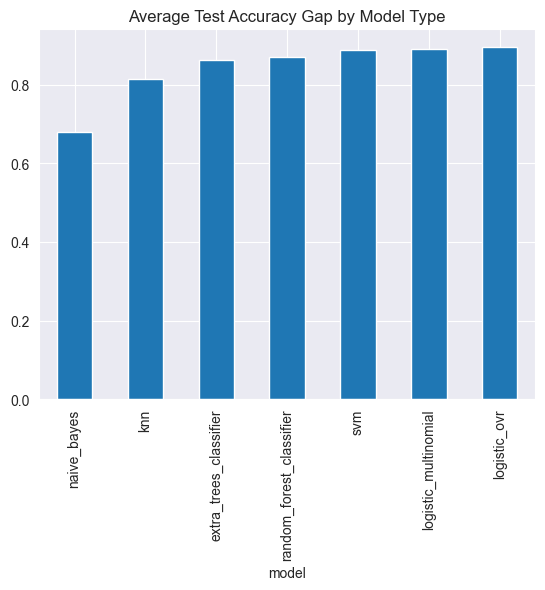

In [13]:
# Average generalization gap for each model type
training_runs_df.groupby('model')['test_accuracy'].mean().sort_values(ascending=True).plot(kind='bar', title='Average Test Accuracy Gap by Model Type')


<Axes: title={'center': 'Average Test Accuracy by Sensor Combination'}, xlabel='sensor_config'>

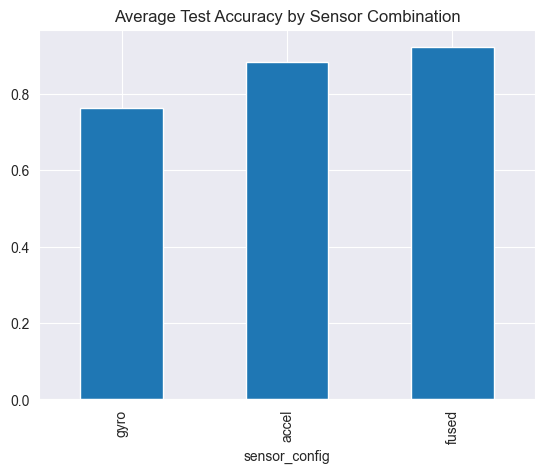

In [14]:
# Average accuracy for each sensor combination
training_runs_df.groupby('sensor_config')['test_accuracy'].mean().sort_values(ascending=True).plot(kind='bar', title='Average Test Accuracy by Sensor Combination')

<Axes: title={'center': 'Average Generalization Gap by Sensor Combination'}, xlabel='sensor_config'>

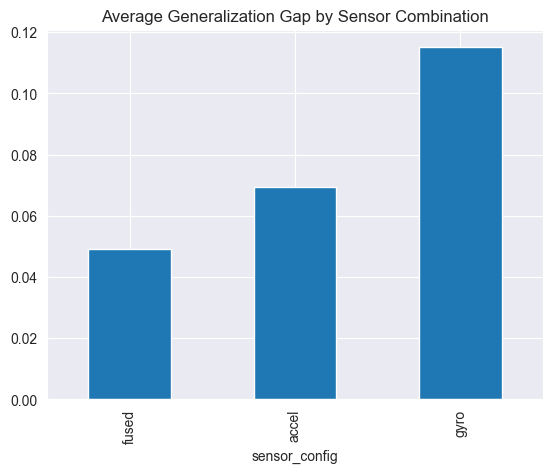

In [15]:
# Average generalization gap for each sensor combination
training_runs_df.groupby('sensor_config')['generalization_gap'].mean().sort_values(ascending=True).plot(kind='bar', title='Average Generalization Gap by Sensor Combination')

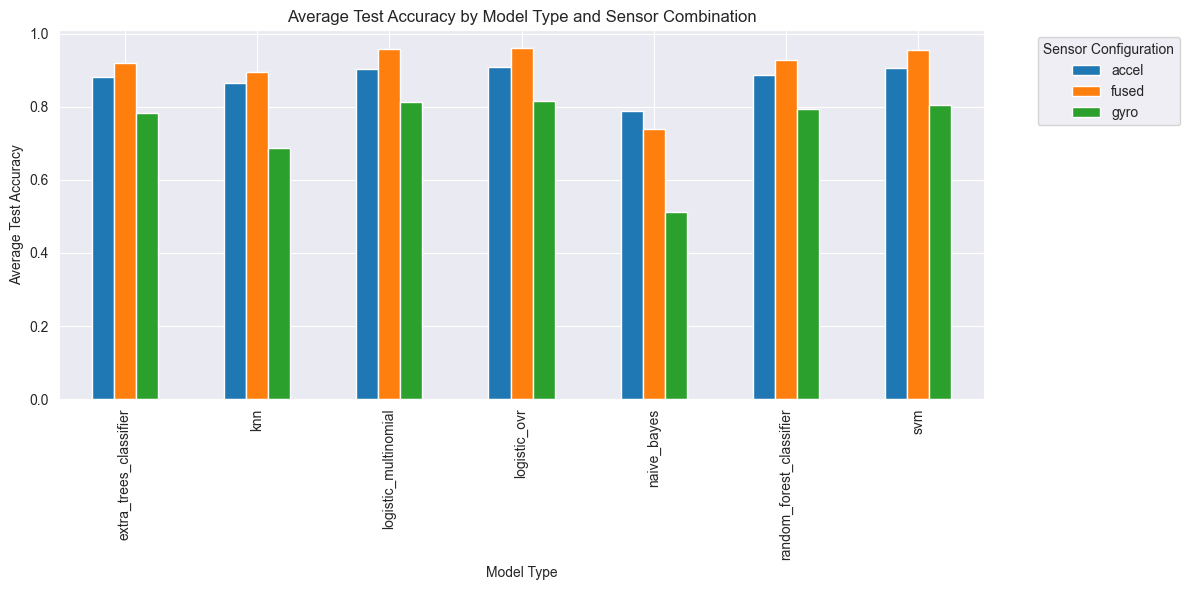

In [16]:
# Bar graoph of average test accuracy by model type and sensor combination
import matplotlib.pyplot as plt
avg_test_accuracy = training_runs_df.groupby(['model', 'sensor_config'])['test_accuracy'].mean().unstack()
avg_test_accuracy.plot(kind='bar', figsize=(12, 6))
plt.title('Average Test Accuracy by Model Type and Sensor Combination')
plt.ylabel('Average Test Accuracy')
plt.xlabel('Model Type')
plt.legend(title='Sensor Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

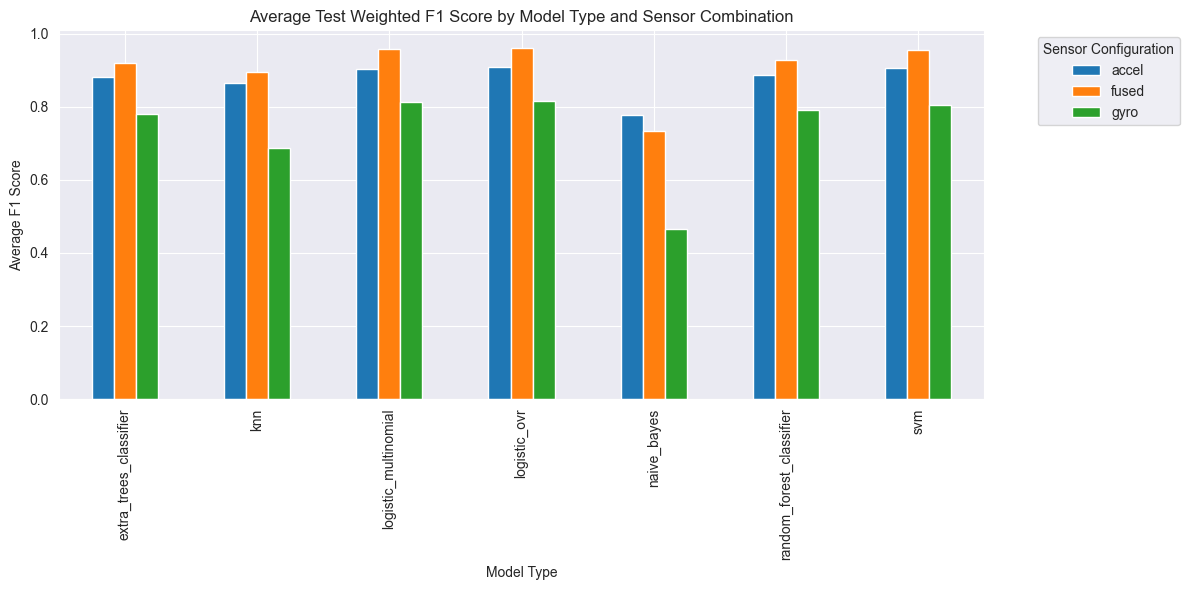

In [17]:
# Bar graoph of average f1 by model type and sensor combination
avg_f1 = training_runs_df.groupby(['model', 'sensor_config'])['test_f1'].mean().unstack()
avg_f1.plot(kind='bar', figsize=(12, 6))
plt.title('Average Test Weighted F1 Score by Model Type and Sensor Combination')
plt.ylabel('Average F1 Score')
plt.xlabel('Model Type')
plt.legend(title='Sensor Configuration', bbox_to_anchor=(1.05, 1), loc
='upper left')
plt.tight_layout()
plt.show()

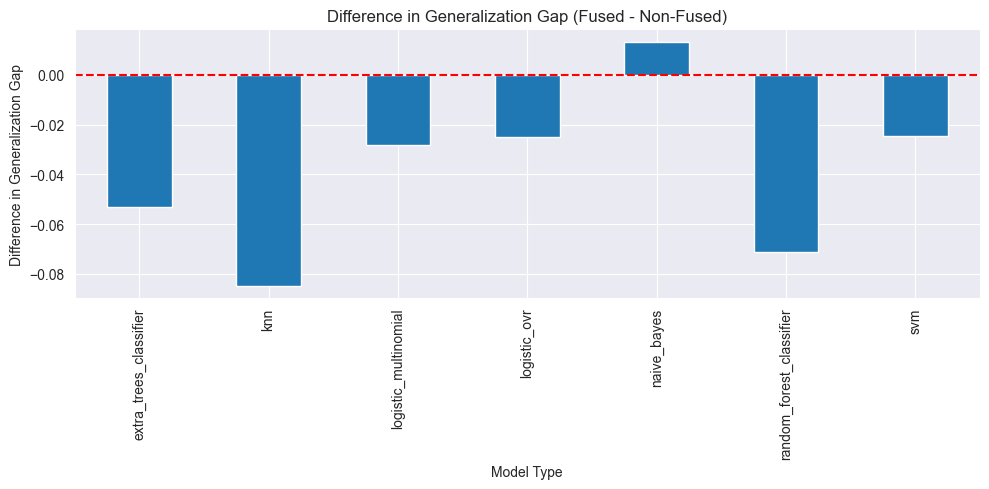

In [18]:
# Difference in generalization gap between fused and non-fused models for each model type
fused_gap = training_runs_df[training_runs_df['sensor_config'] == 'fused'].groupby('model')['generalization_gap'].mean()
non_fused_gap = training_runs_df[training_runs_df['sensor_config'] != 'fused'].groupby('model')['generalization_gap'].mean()
gap_difference = fused_gap - non_fused_gap
gap_difference.plot(kind='bar', title='Difference in Generalization Gap (Fused - Non-Fused)', figsize=(10, 5))
plt.ylabel('Difference in Generalization Gap')
plt.xlabel('Model Type')
plt.axhline(0, color='red', linestyle='--')
plt.tight_layout()
plt.show()

In [19]:
# Table of Fusion Delta (Fused - Best Single Sensor)
fusion_delta = []
for model in unique_models:
    fused_accuracy = training_runs_df[(training_runs_df['model'] == model) & (training_runs_df['sensor_config'] == 'fused')]['test_accuracy'].mean()
    best_single_accuracy = training_runs_df[(training_runs_df['model'] == model) & (training_runs_df['sensor_config'] != 'fused')]['test_accuracy'].max()
    delta = fused_accuracy - best_single_accuracy
    fusion_delta.append({'model': model, 'fusion_delta': delta})
fusion_delta_df = pd.DataFrame(fusion_delta)
fusion_delta_df.sort_values(by='fusion_delta', ascending=False)

,model,fusion_delta
5,logistic_multinomial,0.053953
6,logistic_ovr,0.051578
3,svm,0.044622
2,random_forest_classifier,0.040380
1,extra_trees_classifier,0.037665
4,knn,0.026468
0,naive_bayes,-0.047845


In [20]:
df_train.collect_schema()

Schema([('tBodyAcc-mean()-X', Float64),
        ('tBodyAcc-mean()-Y', Float64),
        ('tBodyAcc-mean()-Z', Float64),
        ('tBodyAcc-std()-X', Float64),
        ('tBodyAcc-std()-Y', Float64),
        ('tBodyAcc-std()-Z', Float64),
        ('tBodyAcc-mad()-X', Float64),
        ('tBodyAcc-mad()-Y', Float64),
        ('tBodyAcc-mad()-Z', Float64),
        ('tBodyAcc-max()-X', Float64),
        ('tBodyAcc-max()-Y', Float64),
        ('tBodyAcc-max()-Z', Float64),
        ('tBodyAcc-min()-X', Float64),
        ('tBodyAcc-min()-Y', Float64),
        ('tBodyAcc-min()-Z', Float64),
        ('tBodyAcc-sma()', Float64),
        ('tBodyAcc-energy()-X', Float64),
        ('tBodyAcc-energy()-Y', Float64),
        ('tBodyAcc-energy()-Z', Float64),
        ('tBodyAcc-iqr()-X', Float64),
        ('tBodyAcc-iqr()-Y', Float64),
        ('tBodyAcc-iqr()-Z', Float64),
        ('tBodyAcc-entropy()-X', Float64),
        ('tBodyAcc-entropy()-Y', Float64),
        ('tBodyAcc-entropy()-Z', Float64),
   

In [21]:
# Graph showing correlation of input features (except last 3) in training data
import numpy as np
import matplotlib.pyplot as plt
dft = df_train.select(pl.all().exclude("activity_id", "subject", "activity")).to_pandas()
corr = dft.corr(method='pearson')

thr = 0.95
tri = np.triu(np.ones(corr.shape), k=1).astype(bool)
pairs = (
    corr.where(tri).stack()
        .rename("r").reset_index()
        .sort_values("r", key=lambda s: s.abs(), ascending=False)
)
high = pairs[pairs["r"].abs() >= thr].tail(15)

high


,level_0,level_1,r
92766,tBodyAccMag-std(),fBodyAccMag-energy(),0.950088
97342,tGravityAccMag-std(),fBodyAccMag-energy(),0.950088
5813,tBodyAcc-max()-Y,fBodyAcc-std()-Y,0.950086
78088,tBodyGyroJerk-std()-X,tBodyGyroJerk-sma(),0.950085
66422,tBodyGyro-min()-Z,fBodyGyro-std()-Z,-0.950055
135190,fBodyAccJerk-mad()-Y,"fBodyAccJerk-bandsEnergy()-1,24__2",0.950051
101498,tBodyAccJerkMag-std(),tBodyGyroJerkMag-sma(),0.950049
101493,tBodyAccJerkMag-std(),tBodyGyroJerkMag-mean(),0.950049
4236,tBodyAcc-mad()-Y,fBodyAccJerk-mean()-Y,0.950041
134292,fBodyAccJerk-std()-X,fBodyAccJerk-mad()-Y,0.950035


In [22]:
df_train['activity'].value_counts()/sum(df_train['activity'].value_counts()['counts'])

ColumnNotFoundError: "counts" not found

## Report Graphs

In [32]:
# Create /docs/figures directory if it doesn't exist
import os
os.makedirs(BASE_DIR / "outputs" / "eda_plots", exist_ok=True)

path_to_save = str(BASE_DIR / "outputs" / "eda_plots")
path_to_save

'/Users/srihariraman/Desktop/DS5220/sensor-fusion-har-project/outputs/eda_plots'

/var/folders/ht/ljrb1cwj3xg1_7ttyxw6hfj40000gn/T/ipykernel_3471/1353734019.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=training_runs_df, x='model', y='test_f1',


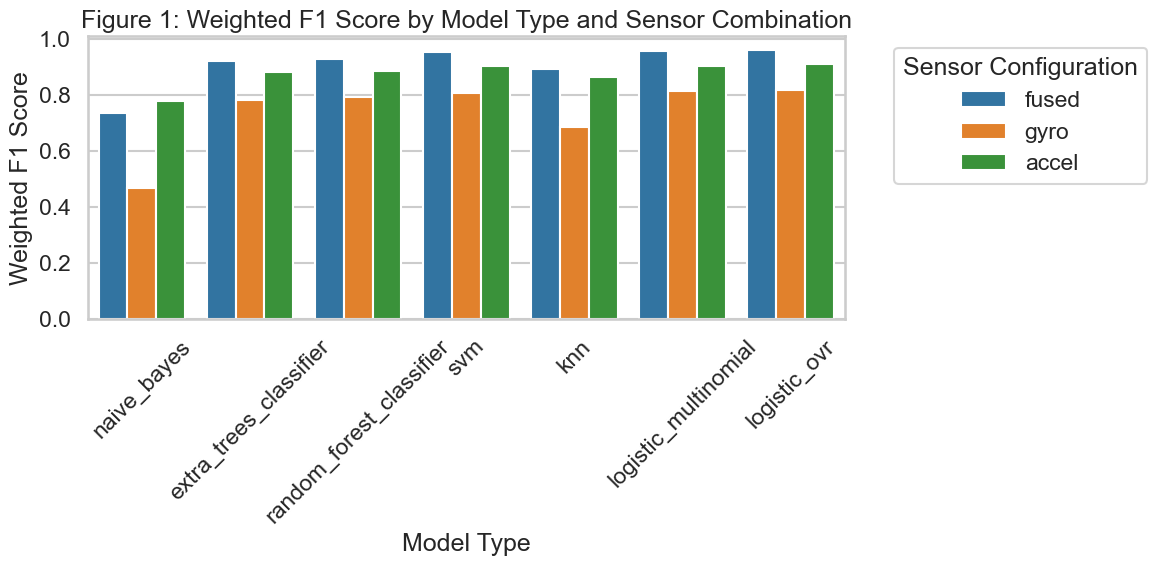

In [33]:
# Weighted F1 Score by Model Type and Sensor Combination
import seaborn as sns
import matplotlib.pyplot as plt

# Bigger font sizes for better visibility
sns.set_context("talk")
sns.set_style("whitegrid")


plt.figure(figsize=(12, 6))
sns.barplot(data=training_runs_df, x='model', y='test_f1',
            hue='sensor_config', ci=None)
plt.title('Figure 1: Weighted F1 Score by Model Type and Sensor Combination')
plt.ylabel('Weighted F1 Score')
plt.xlabel('Model Type')
plt.legend(title='Sensor Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Save as PDF
plt.savefig(os.path.join(path_to_save, "f1_score_by_model_and_sensor.pdf"))
plt.show()

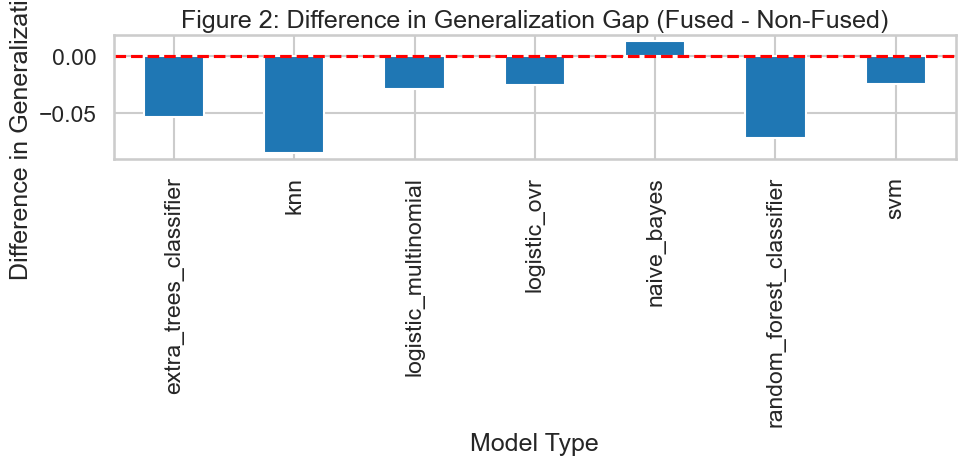

In [34]:
# Difference in generalization gap between fused and non-fused models for each model type
fused_gap = training_runs_df[training_runs_df['sensor_config'] == 'fused'].groupby('model')['generalization_gap'].mean()
non_fused_gap = training_runs_df[training_runs_df['sensor_config'] != 'fused'].groupby('model')['generalization_gap'].mean()
gap_difference = fused_gap - non_fused_gap
gap_difference.plot(kind='bar', title='Figure 2: Difference in Generalization Gap (Fused - Non-Fused)', figsize=(10, 5))
plt.ylabel('Difference in Generalization Gap')
plt.xlabel('Model Type')
plt.axhline(0, color='red', linestyle='--')
plt.tight_layout()

#Save as PDF
plt.savefig(os.path.join(path_to_save, "generalization_gap_difference.pdf"))
plt.show()

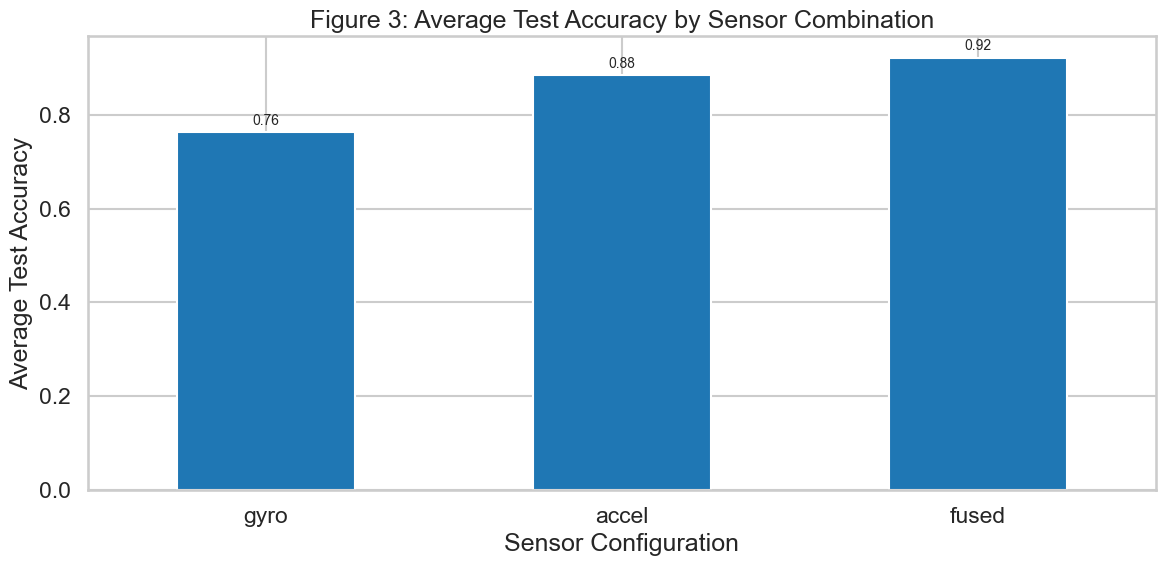

In [35]:
# Average accuracy for each sensor combination
plt.figure(figsize=(12, 6))
grouped = training_runs_df.groupby('sensor_config')['test_accuracy'].mean().sort_values(ascending=True)

grouped.plot(kind='bar', title='Figure 3: Average Test Accuracy by Sensor Combination')
plt.ylabel('Average Test Accuracy')
plt.xlabel('Sensor Configuration')
plt.xticks(rotation=0)
plt.tight_layout()

# Add value labels on top of the bars
for index, value in enumerate(grouped):
    plt.text(index, value + 0.01, f"{value:.2f}",
                ha='center', va='bottom', fontsize=10)

# Save as PDF
plt.savefig(os.path.join(path_to_save, "average_test_accuracy_by_sensor.pdf"))
plt.show()


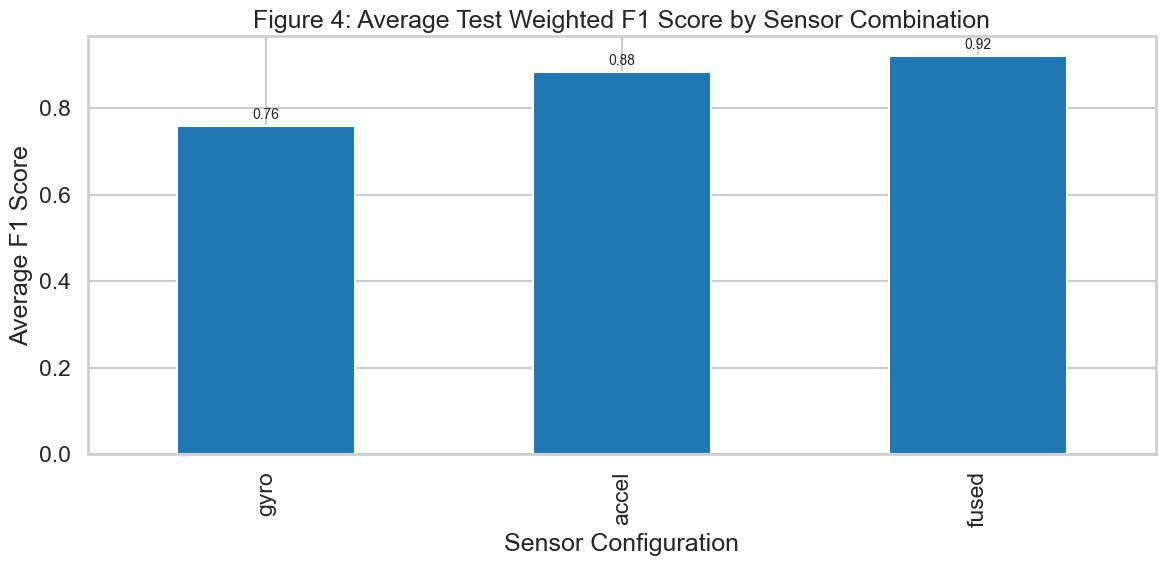

In [36]:
# Average weighted F1 Score for each sensor combination
plt.figure(figsize=(12, 6))
grouped_f1 = training_runs_df.groupby('sensor_config')['test_f1'].mean().sort_values(ascending=True)
grouped_f1.plot(kind='bar', title='Figure 4: Average Test Weighted F1 Score by Sensor Combination')
plt.ylabel('Average F1 Score')
plt.xlabel('Sensor Configuration')
plt.tight_layout()
# Add value labels on top of the bars
for index, value in enumerate(grouped_f1):
    plt.text(index, value + 0.01, f"{value:.2f}",
                ha='center', va='bottom', fontsize=10)

plt.savefig(os.path.join(path_to_save, "average_test_f1_weighted_by_sensor.pdf"))
plt.show()

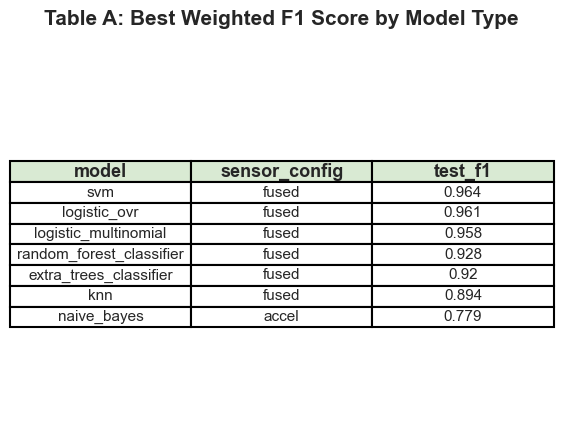

In [39]:
# Find best F1 score for each model
best_f1_table = (
    training_runs_df.loc[
        training_runs_df.groupby("model")["test_f1"].idxmax(),
        ["model", "sensor_config", "test_f1"]
    ]
    .sort_values("test_f1", ascending=False)
    .reset_index(drop=True)
)

# Style table for visualization
fig, ax = plt.subplots(figsize=(6, 2 + len(best_f1_table) * 0.4))
ax.axis('off')

# Create table plot
table = ax.table(
    cellText=best_f1_table.round(3).values,
    colLabels=best_f1_table.columns,
    cellLoc='center',
    loc='center'
)

# Style table
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 1.2)

# Set title
plt.title('Table A: Best Weighted F1 Score by Model Type', fontsize=15, weight='bold', pad=20)

# Header styling
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_fontsize(13)
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#d9ead3')

# Save as high-quality image for LaTeX
plt.tight_layout()

plt.savefig(os.path.join(path_to_save, "best_f1_score_by_model.pdf"), dpi=300, bbox_inches='tight')

plt.show()


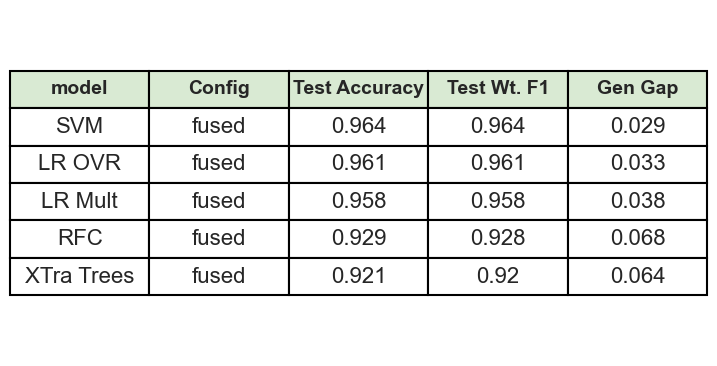

In [71]:
# Best model setup
best_model_setup = training_runs_df.loc[
    training_runs_df.groupby("model")["generalization_gap"].idxmin(),
    ["model", "sensor_config", "Name", "test_accuracy", "test_f1", "generalization_gap"]
].sort_values("test_f1", ascending=False).reset_index(drop=True).head(5)

# Only keep relevant columns
best_model_setup = best_model_setup[["model", "sensor_config", "test_accuracy", "test_f1", "generalization_gap"]]

model_name_mapping = {
    "svm": "SVM",
    "logistic_ovr": "LR OVR",
    "logistic_multinomial": "LR Mult",
    "random_forest_classifier": "RFC",
    "extra_trees_classifier": "XTra Trees",
}

column_name_mapping = {
    "Model": "Model Type",
    "sensor_config": "Config",
    "test_accuracy": "Test Accuracy",
    "test_f1": "Test Wt. F1",
    "generalization_gap": "Gen Gap"
}

# Rename columns for better readability
best_model_setup.rename(columns=column_name_mapping, inplace=True)

# Map model names to more readable format
best_model_setup['model'] = best_model_setup['model'].map(model_name_mapping)

# Style the table for visualization
fig, ax = plt.subplots(figsize=(8, 3 + len(best_model_setup) * 0.2))
ax.axis('off')

# Create table plot
table = ax.table(
    cellText=best_model_setup.round(3).values,
    colLabels=best_model_setup.columns,
    cellLoc='center',
    loc='center'
)
# Style table
table.auto_set_font_size(False)
table.set_fontsize(16)
table.scale(1.4, 2)
# plt.title('Table A: Best Model Setup by F1 Score', fontsize=15, weight ='bold', pad=20)

# Header styling
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_fontsize(14)
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#d9ead3')

# Save
plt.tight_layout()
plt.savefig(os.path.join(path_to_save, "best_model_setup_by_f1.pdf"), dpi=300, bbox_inches='tight')
plt.show()

